In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

$y$ is calculated by using the relation $$ y = 2.5x + 5 + \text(error) $$

In [27]:
x = np.random.rand(100) * 10
noise = np.random.normal(0, 2, size = x.shape)
y = 2.5 * x + 5 + noise

In [39]:
x_reshaped = x.reshape(-1, 1)
model = LinearRegression().fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

In [40]:
residuals = y - y_pred

In [41]:
sorted_indices = np.argsort(X.flatten())
X_sorted = X[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

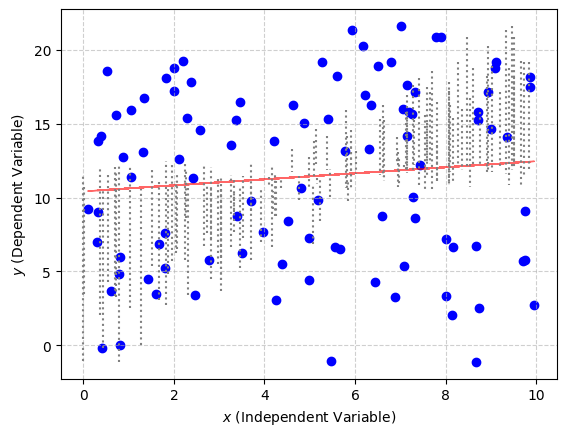

In [42]:
fix, ax = plt.subplots()

ax.scatter(x, y, color = "blue")
ax.plot(x, y_pred, color = "red", alpha = 0.6,linewidth = 1)

ax.set_xlabel(r"$x$ (Independent Variable)")
ax.set_ylabel(r"$y$ (Dependent Variable)")

for i in range(len(X)):
    plt.vlines(X[i], y[i], y_pred[i], color='gray', linestyle='dotted')

ax.grid(True, linestyle = '--', alpha = 0.6)

plt.show()

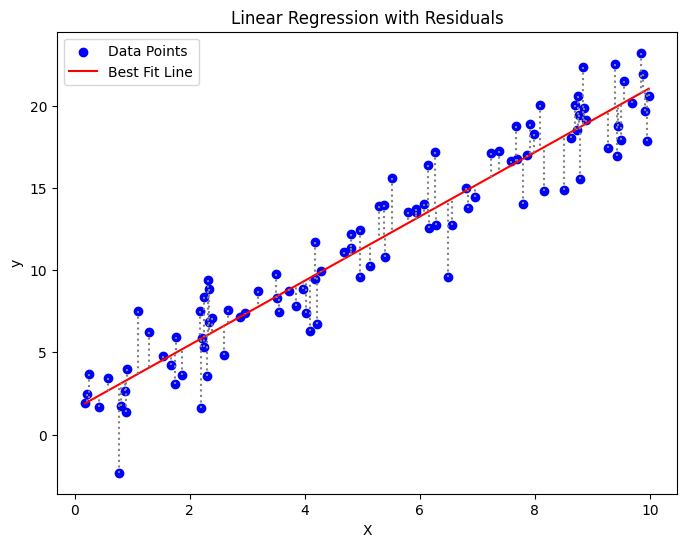

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data (X: independent variable, y: dependent variable)
X = np.random.rand(100, 1) * 10  # Random data points
y = 2 * X + 1 + np.random.randn(100, 1) * 2  # Linear relationship with noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Sorting X for a smooth line of best fit
sorted_indices = np.argsort(X.flatten())
X_sorted = X[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting data points and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # Scatter plot of the data
plt.plot(X_sorted, y_pred_sorted, color='red', label='Best Fit Line')  # Line of best fit

# Add residuals as vertical lines
for i in range(len(X)):
    plt.vlines(X[i], y[i], y_pred[i], color='gray', linestyle='dotted')  # Residuals as vertical lines

plt.title('Linear Regression with Residuals')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


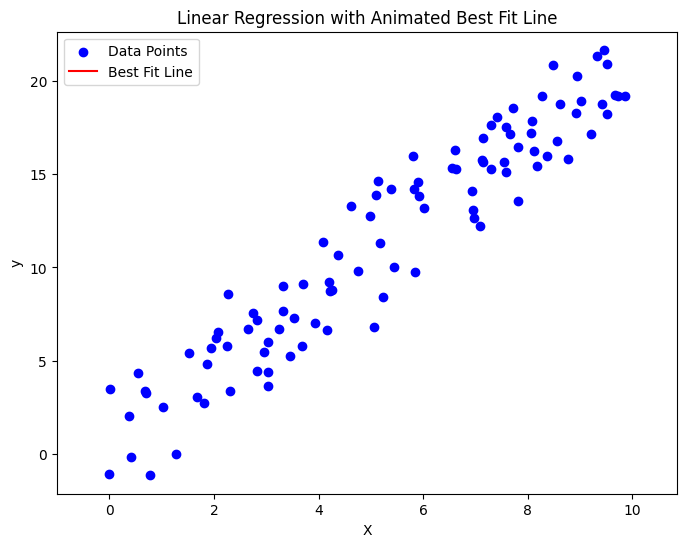

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression

# Sample data (X: independent variable, y: dependent variable)
X = np.random.rand(100, 1) * 10  # Random data points
y = 2 * X + 1 + np.random.randn(100, 1) * 2  # Linear relationship with noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Sort the X and y_pred values for drawing the line from left to right
sorted_indices = np.argsort(X.flatten())  # Get sorted indices of X
X_sorted = X[sorted_indices]  # Sorted X values
y_pred_sorted = y_pred[sorted_indices]  # Corresponding sorted predictions

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the scatter points
ax.scatter(X, y, color='blue', label='Data Points')

# Initialize the line object for the best fit line
line, = ax.plot([], [], color='red', label='Best Fit Line')  # Empty line initially

# Function to update the plot at each frame (used in FuncAnimation)
def update(frame):
    # Set the data for the line (only show up to the 'frame' number of points)
    line.set_data(X_sorted[:frame], y_pred_sorted[:frame])  # Progressively add points
    return line,

# Set plot limits and labels
ax.set_xlim(X_sorted.min() - 1, X_sorted.max() + 1)
ax.set_ylim(y.min() - 1, y.max() + 1)
ax.set_title('Linear Regression with Animated Best Fit Line')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()

# Create the animation with slower speed
ani = FuncAnimation(fig, update, frames=range(1, len(X_sorted) + 1), interval=100, repeat=False)

# Show the plot with animation
plt.show()

# Save the animation as a GIF (you can change to .mp4 if FFmpeg is installed)
ani.save('regression-animation.gif', writer='pillow', fps=20)
